# Online Shoppers Purchasing Intention

The aim of this project is to build a model that can accurately classify E-commerece shoppers intentions of weather they plan to make a purchase or not.

## Exploratory Analysis 

- This dataset does not contain any missing values. 
- I will be using the Revenue feature as the label for a classification problem. 



In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [192]:
# read data into a dataframe 
df = pd.read_csv("online_shoppers_intention.csv")

In [193]:
# quick look at the first 5 rows of the data 
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [194]:
# get a simple statistical report for all numeric columns 
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [195]:
# Value counts for each month.
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [196]:
# Value counts for visitors type 
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

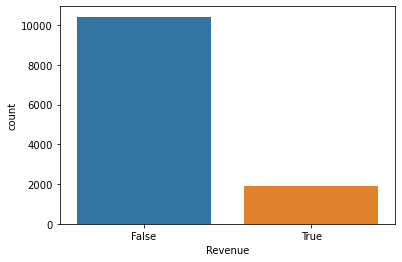

In [197]:
sns.countplot(x="Revenue", data = df)

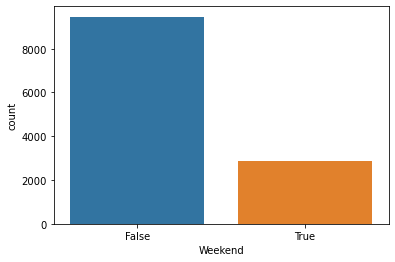

In [198]:
sns.countplot(x="Weekend", data=df)

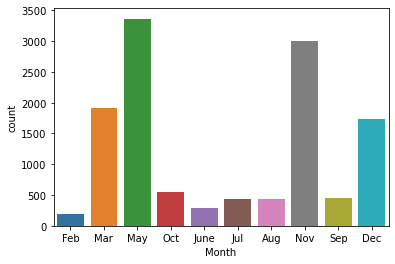

In [199]:
sns.countplot(x="Month", data=df)

In [201]:
columns = df.columns.tolist()
numerical = columns[:10]
categorical = columns[10:]

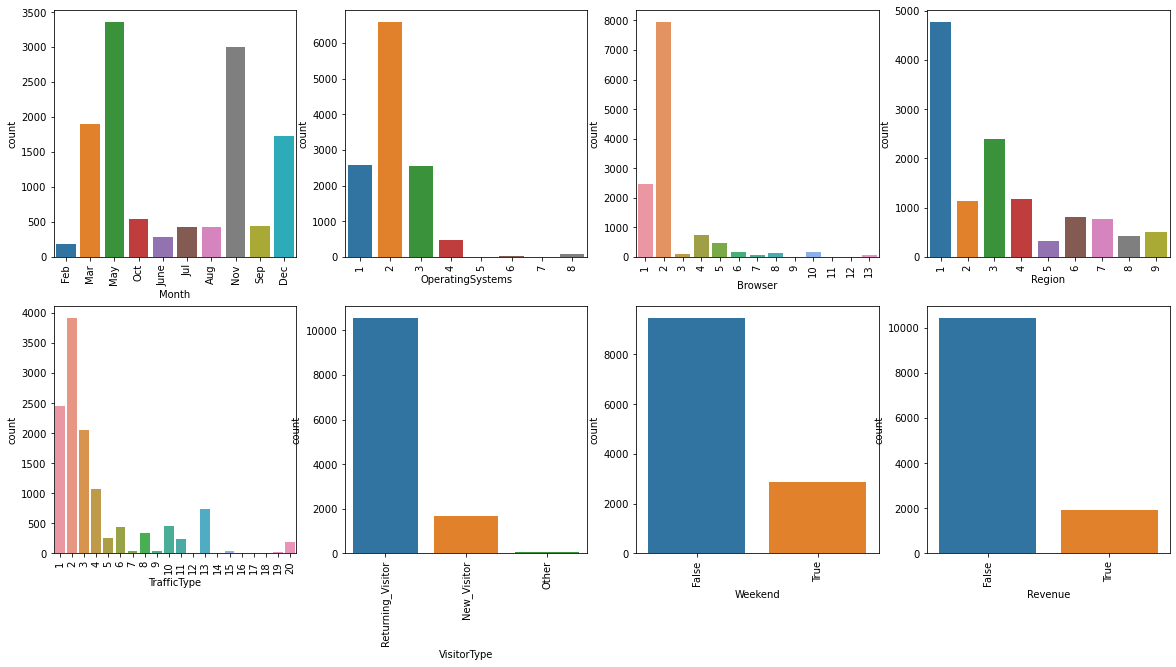

In [202]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Handling Categorical data

I utilized the Mapping function to encode the month and visitors feature. I utilized the label encoder from the sklearn library to encode the Revenue and Weekend columns. 

In [203]:
# manualy encoding month values 
month_mapping = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 
                 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month'] = df['Month'].map(month_mapping)

# manually encoding visitors values 
visitors = {'Returning_Visitor':1, 'New_Visitor':2, 'Other':3}
df['VisitorType'] = df['VisitorType'].map(visitors)

In [204]:
# encode categorical data weekend and revenue to 0 and 1 
# 0 for no revenue and 1 for revenue 
# 0 for not weekend and 1 for weekend 

labelencoder = LabelEncoder()

df['Revenue'] = labelencoder.fit_transform(df['Revenue'])
df['Weekend'] = labelencoder.fit_transform(df['Weekend'])

In [168]:
df.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Month                          0.096713                 0.057885   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
VisitorType                    0.016680                 0.019120   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
Month                         0.063500                0.044354   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
VisitorType                  -0.058211               -0.045372   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
Month                          0.156022                 0.137520    -0.066562   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
VisitorType                   -0.127916                -0.118273    -0.114916   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue            

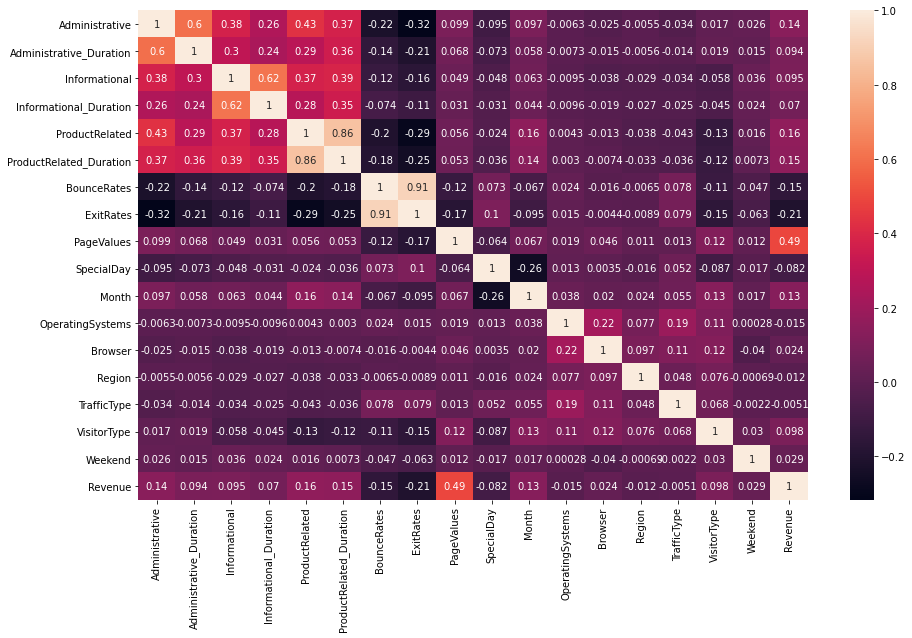

In [169]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [190]:
# load the dataset 
def load_dataset(data):
    # retrieve numpy array
    dataset = data.values
    # split into features and label
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y



def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_encoded = le.transform(y_train)
    y_test_encoded = le.transform(y_test)
    return y_train_encoded, y_test_encoded

In [181]:
# split the data in to training and test sets
# load the dataset

X, y = load_dataset(df)

# split into train and test sets and use 70% for training and 30% for test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

# summarize 
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

# prepare target 
y_train_encoded, y_test_encoded = prepare_targets(y_train, y_test)

Train (8631, 17) (8631,)
Test (3699, 17) (3699,)


### Performing standardization and normalization

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
stdsc = StandardScaler()

In [184]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Fitting Logistic Regression model

In this section I am training Logistic Regression model using all features. 

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
lr = LogisticRegression(penalty='l1', solver = 'liblinear')

In [187]:
lr.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [188]:
print('Training Accuracy:', lr.score(X_train_std, y_train))

Training Accuracy: 0.8813578959564361


In [189]:
print('Test Accuracy:', lr.score(X_test_std, y_test))

Test Accuracy: 0.8853744255204109
